In [5]:
#!pip uninstall scikit-learn imbalanced-learn pycaret -y
#!pip install scikit-learn
#!pip install imbalanced-learn
#!pip install xgboost
#!pip install pycaret -q

In [6]:
#!pip install autoviz -q

In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import joblib
from pycaret.regression import *
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Read the dataset and print the top 5 elements of the dataset
df = pd.read_csv('../input/house-price-tehran-irani/tehranhouses.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [9]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
509,88,2,True,True,True,Pardis,740000000,24666.67
2083,101,2,True,True,True,Shahrake Gharb,6565000000,218833.33
48,110,2,True,True,True,Ray,2035000000,67833.33
1395,62,1,False,True,True,Pirouzi,1380000000,46000.00
3343,125,2,False,True,False,Gheitarieh,1550000000,51666.67


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df=df.drop('Price(USD)',axis='columns')
df.sample(11)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
1510,73,2,True,True,True,Punak,3550000000
1994,107,2,True,True,True,Velenjak,13200000000
2950,190,3,True,True,True,East Ferdows Boulevard,9500000000
440,300,3,True,True,True,Niavaran,55500000000
1004,87,2,False,False,True,Ray,1570000000
1582,87,2,True,True,True,Pardis,720000000
1538,66,2,True,False,True,Ostad Moein,1580000000
954,114,2,True,True,True,Pirouzi,3762000000
2426,65,1,False,False,False,NaN,650000000
1699,90,2,True,True,True,Punak,3520000000


In [12]:
set_up = setup(df,target='Price',session_id=85,remove_outliers=True)
set_up

,Description,Value
0,Session id,85
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3479, 7)"
4,Transformed data shape,"(3357, 7)"
5,Transformed train set shape,"(2313, 7)"
6,Transformed test set shape,"(1044, 7)"
7,Numeric features,1
8,Categorical features,2
9,Rows with missing values,0.7%


In [13]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [14]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1787068173.7997,32607070799563251712.0000,5370151246.9630,0.5414,0.5069,0.4474,0.7060
et,Extra Trees Regressor,1817845651.8962,33520492428413251584.0000,5407713658.5829,0.5387,0.5174,0.4342,0.2480
lightgbm,Light Gradient Boosting Machine,1850921321.3913,33901565924708720640.0000,5473993494.4639,0.5246,0.4909,0.4263,16.6770
xgboost,Extreme Gradient Boosting,1771836329.8145,33832566452259270656.0000,5487361668.0116,0.5216,0.5159,0.4102,0.3690
gbr,Gradient Boosting Regressor,1869615141.1658,32771862574859378688.0000,5452077188.9199,0.5211,0.5212,0.4816,0.1600
rf,Random Forest Regressor,1834918436.3653,35106093936664793088.0000,5550384845.2397,0.5137,0.5014,0.4146,0.2940
knn,K Neighbors Regressor,2037384969.1831,37218050169226051584.0000,5751097217.5036,0.4773,0.5647,0.5148,0.1130
lasso,Lasso Regression,2601293634.5707,36766956168881344512.0000,5814135285.5933,0.4616,0.9709,1.0037,0.1120
lr,Linear Regression,2601293583.7965,36766955964731834368.0000,5814135263.7572,0.4616,0.9709,1.0037,0.6430
lar,Least Angle Regression,2601293634.3637,36766956164225097728.0000,5814135285.2164,0.4616,0.9709,1.0037,0.1420


In [15]:
my_model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2436407273.8361,52291336693315387392.0000,7231274900.9642,0.4934,0.6176,0.5137
1,1794569562.2295,47927108893652238336.0000,6922940769.1856,0.4853,0.4728,0.3674
2,1438751017.8033,19944802001693495296.0000,4465960367.2327,0.5474,0.5287,0.5112
3,1848169644.2295,51038057330683944960.0000,7144092477.7528,0.3295,0.5467,0.3775
4,1939670195.7377,36721244317009088512.0000,6059805633.5999,0.4617,0.4852,0.3741
5,2389075966.6955,52432015637687451648.0000,7240995486.6501,0.3583,0.5344,0.4125
6,1986535318.4527,51242994435216351232.0000,7158421225.0479,0.4293,0.4705,0.3673
7,1348971514.4033,11585914177489559552.0000,3403808775.1061,0.5758,0.4715,0.3761
8,1515775913.0041,11929439687114323968.0000,3453902095.7628,0.6574,0.4999,0.4015


In [17]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   object
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3456 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(2), object(2)
memory usage: 119.0+ KB


In [19]:
df.describe()

,Room,Price
count,3479.000000,3.479000e+03
mean,2.079908,5.359023e+09
std,0.758275,8.099935e+09
min,0.000000,3.600000e+06
25%,2.000000,1.418250e+09
50%,2.000000,2.900000e+09
75%,2.000000,6.000000e+09
max,5.000000,9.240000e+10


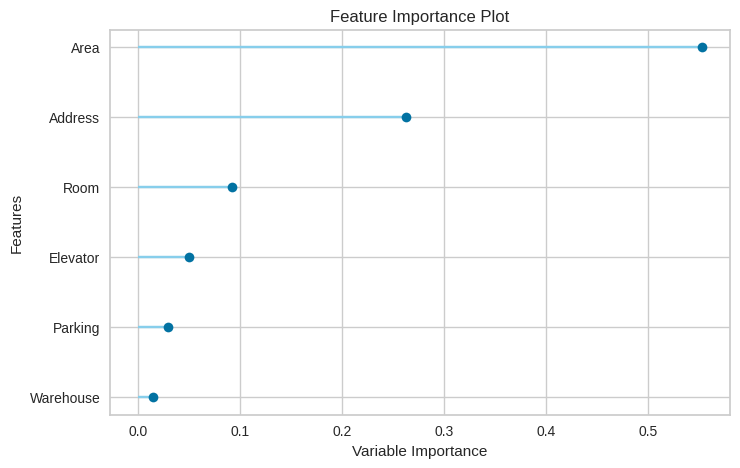

In [20]:
plot_model(estimator = my_model,plot = 'feature')

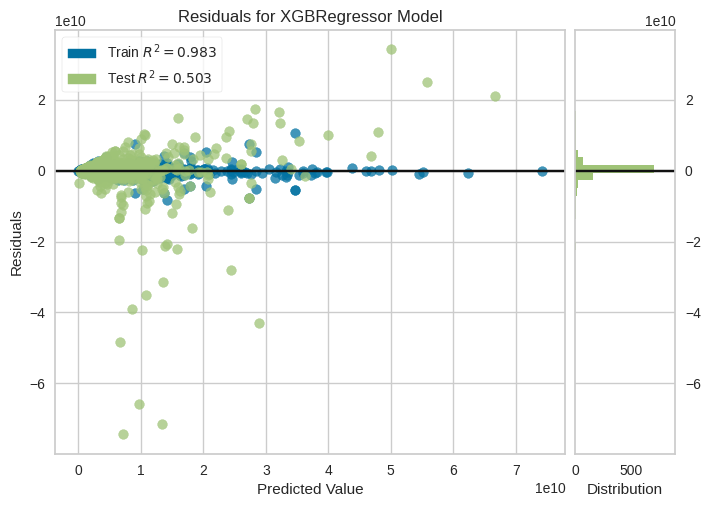

In [21]:
plot_model(estimator = my_model)

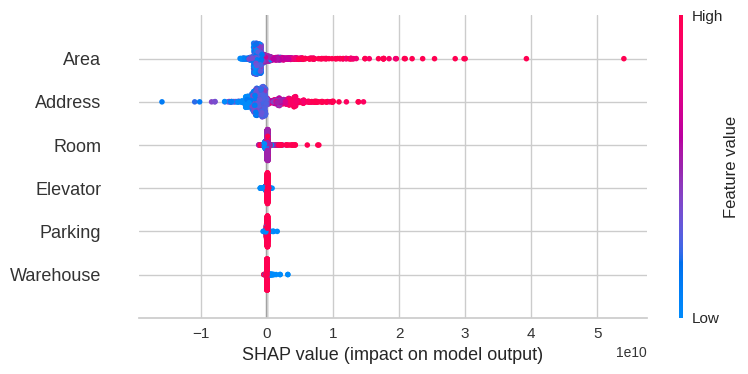

In [22]:
interpret_model(my_model)

In [23]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   int64 
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3456 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(3), object(1)
memory usage: 119.0+ KB


In [25]:
df.describe()

,Area,Room,Price
count,3.479000e+03,3479.000000,3.479000e+03
mean,8.744000e+06,2.079908,5.359023e+09
std,3.167266e+08,0.758275,8.099935e+09
min,3.000000e+01,0.000000,3.600000e+06
25%,6.900000e+01,2.000000,1.418250e+09
50%,9.000000e+01,2.000000,2.900000e+09
75%,1.200000e+02,2.000000,6.000000e+09
max,1.616000e+10,5.000000,9.240000e+10


In [26]:
df.shape

(3479, 7)

In [27]:
# check for data type
print(df.dtypes)

Area          int64
Room          int64
Parking        bool
Warehouse      bool
Elevator       bool
Address      object
Price         int64
dtype: object


In [28]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64

In [29]:
# I will drop missing values although it is not necessary because used models can manage missing values.
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Address      0
Price        0
dtype: int64

In [31]:
df.shape

(3456, 7)

In [32]:
df['Parking'].value_counts(normalize=True)*100

Parking
True     84.751157
False    15.248843
Name: proportion, dtype: float64

In [33]:
pd.crosstab( df.Parking, df.Room )

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [34]:
below_85 = df[ df.Area <= 85 ]
len(below_85)

1522

In [35]:
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [36]:
len(df.Address.unique())

192

In [37]:
round(df.Price.mean())

5379956887

In [38]:
df.groupby( 'Room' )['Price'].mean()

Room
0    7.860500e+09
1    1.707481e+09
2    3.330303e+09
3    1.093869e+10
4    2.560033e+10
5    3.373439e+10
Name: Price, dtype: float64

In [39]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [40]:
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [41]:
df2 = df.copy()

In [42]:
df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)

In [43]:
df2

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,"1,850,000,000"
1,60,1,True,True,True,Shahran,"1,850,000,000"
2,79,2,True,True,True,Pardis,"550,000,000"
3,95,2,True,True,True,Shahrake Qods,"902,500,000"
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000"
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,"3,500,000,000"
3475,83,2,True,True,True,Niavaran,"6,800,000,000"
3476,75,2,False,False,False,Parand,"365,000,000"
3477,105,2,True,True,True,Dorous,"5,600,000,000"


In [44]:
df.dtypes

Area          int64
Room          int64
Parking        bool
Warehouse      bool
Elevator       bool
Address      object
Price         int64
dtype: object

# **Visualization...** 

<Figure size 800x500 with 0 Axes>

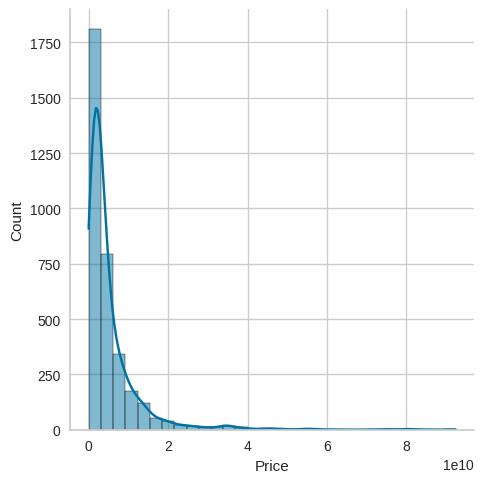

In [45]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'] , bins=30 , kde=True )

<Axes: >

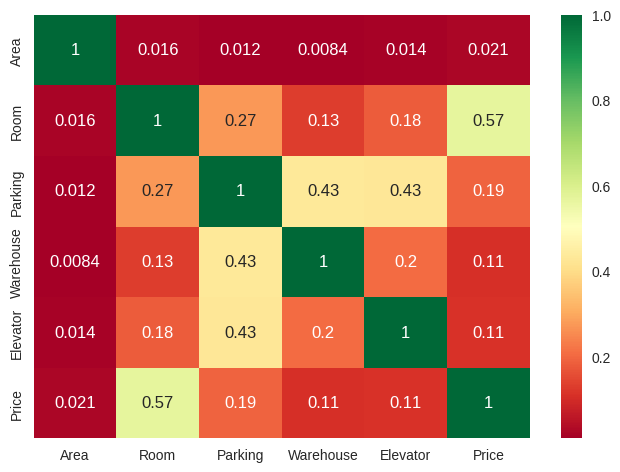

In [46]:
df_numeric = df.select_dtypes(include=[bool, int])
sns.heatmap(df_numeric.corr(), annot=True,cmap='RdYlGn')

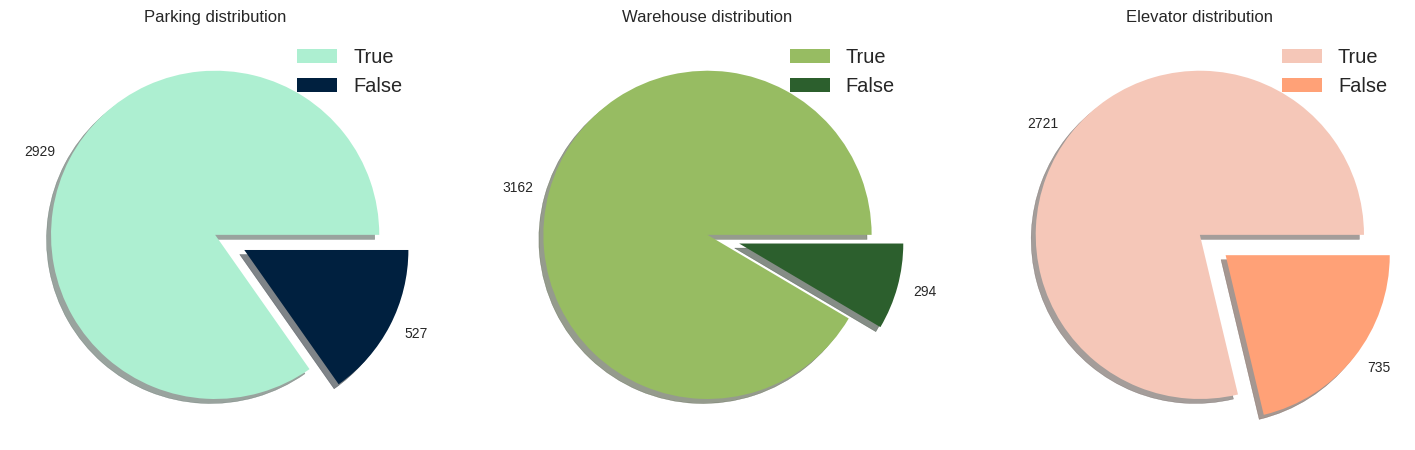

In [47]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

In [48]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]

Text(0.5, 1.0, 'Number of flats in location')

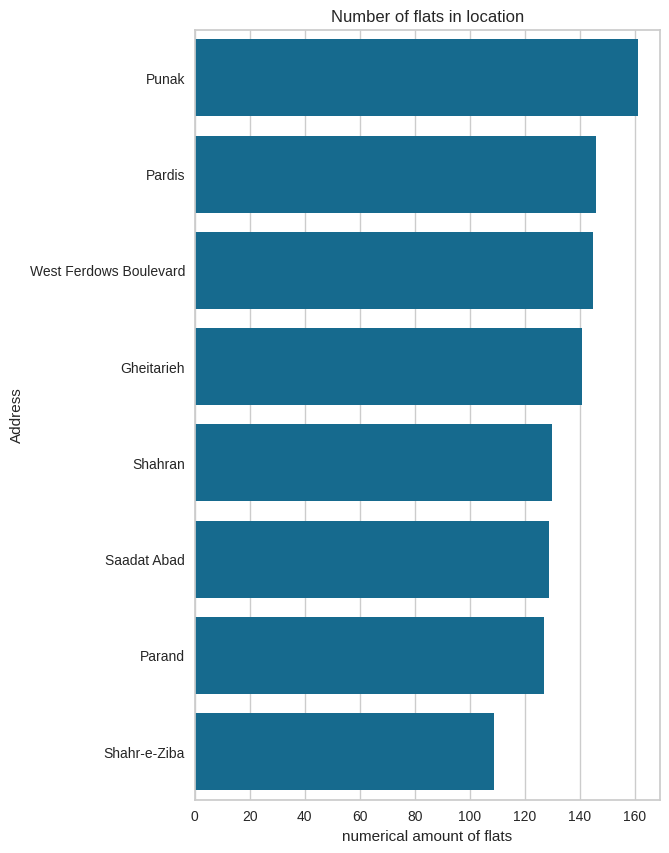

In [49]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index,ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('Number of flats in location')

In [50]:
df.sort_values('Price',ascending=False)[['Address']].head(20)

,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


# **Preprocessing** 

In [51]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000
3475,83,2,True,True,True,Niavaran,6800000000
3476,75,2,False,False,False,Parand,365000000
3477,105,2,True,True,True,Dorous,5600000000


In [52]:
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000


In [53]:
df_numeric = df.select_dtypes(include=[int])
print(f"Skewness of features:\n{df_numeric.skew()}")

Skewness of features:
Area        44
Room         1
Parking     -2
Warehouse   -3
Elevator    -1
Price        5
dtype: float64


<Axes: xlabel='Price'>

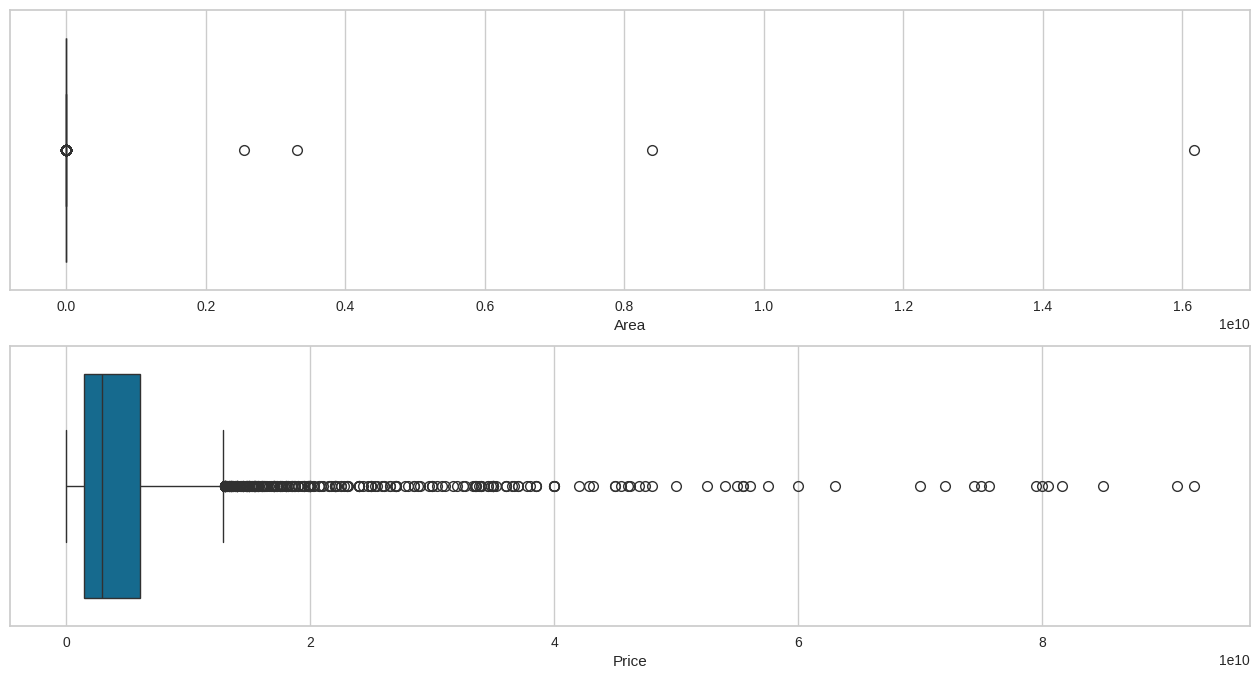

In [54]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])

In [55]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [56]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 237
Number of price outliers: 310
Number of outliers: 366


In [57]:
total_outliers

array([  25,   58,   83,  101,  145,  159,  160,  166,  173,  176,  187,
        189,  193,  195,  196,  200,  210,  215,  218,  220,  226,  234,
        235,  238,  260,  262,  264,  269,  270,  281,  283,  284,  297,
        299,  315,  327,  329,  338,  339,  340,  342,  343,  344,  345,
        346,  347,  348,  349,  351,  353,  355,  356,  362,  363,  364,
        394,  410,  411,  412,  429,  430,  436,  439,  458,  463,  496,
        512,  514,  515,  516,  525,  534,  547,  553,  559,  564,  565,
        566,  567,  569,  572,  576,  577,  578,  579,  582,  599,  600,
        610,  627,  635,  638,  640,  641,  648,  649,  652,  706,  712,
        721,  729,  730,  731,  738,  739,  740,  753,  765,  792,  803,
        804,  816,  819,  828,  834,  836,  849,  872,  876,  891,  955,
        956,  962, 1005, 1006, 1012, 1021, 1022, 1028, 1031, 1033, 1103,
       1110, 1114, 1128, 1136, 1137, 1148, 1174, 1175, 1228, 1230, 1231,
       1232, 1258, 1260, 1265, 1266, 1270, 1282, 12

In [58]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index = True, right_index = True)
df_final.drop(columns = 'Address', inplace = True)
df_final.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
df_final

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,1,1,1,902500000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,1,1,1,7000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3500000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3475,83,2,1,1,1,6800000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3476,75,2,0,0,0,365000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3477,105,2,1,1,1,5600000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
X = df_final.drop(columns = 'Price')
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2764, 197)
shape of y train: (2764,)
shape of x test: (692, 197)
shape of y train: (692,)


In [61]:
def parameter_finder (model, parameters):
    
    start = time.time()
    
    grid = GridSearchCV(model, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1), 
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_name = str(model).split('(')[0]
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
    
       
    return train_score, test_score, RMSE

In [62]:
xgboost_model = XGBRegressor(n_jobs=-1)
param_grid_xgb = {
    'n_estimators': [100,300], 
    'learning_rate': [0.1, 0.05],  
    'max_depth': [3, 4, 5],  
    'subsample': [0.65, 0.75], 
    'colsample_bytree': [1.0],  
    'alpha': [0, 1, 5],  
    'lambda': [0, 1, 5],  
    'gamma' : [0]
}
xgb_train_score,xgb_test_score,xgb_RMSE = parameter_finder(xgboost_model, param_grid_xgb)

The best parameters for XGBRegressor model is: {'alpha': 0, 'colsample_bytree': 1.0, 'gamma': 0, 'lambda': 5, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.75}
--------------------
(R2 score) in the training set is 90.52% for XGBRegressor model.
(R2 score) in the testing set is 78.39% for XGBRegressor model.
RMSE is 4,327,235,183.064994 for XGBRegressor model.
--------------------
Runtime of the program is: 3386.69


In [66]:
from sklearn.metrics import mean_squared_error, r2_score


best_params = {
    'n_estimators': 100, 
    'learning_rate': 0.05,  
    'max_depth': 5,  
    'subsample': 0.65, 
    'colsample_bytree': 1.0,  
    'alpha': 0,  
    'lambda': 5,  
    'gamma' : 0                  
}

xgboost_final_model = XGBRegressor(**best_params, n_jobs=-1)

xgboost_final_model.fit(X_train, y_train)

y_train_pred = xgboost_final_model.predict(X_train)
y_test_pred = xgboost_final_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


print(f"Final model (R2 score) on training set: {train_r2:0.2%}")
print(f"Final model (R2 score) on testing set: {test_r2:0.2%}")
print(f"Final model RMSE on training set: {train_rmse:0.2f}")
print(f"Final model RMSE on testing set: {test_rmse:0.2f}")

Final model (R2 score) on training set: 86.21%
Final model (R2 score) on testing set: 77.02%
Final model RMSE on training set: 2892175476.08
Final model RMSE on testing set: 4462847678.45


In [70]:
from joblib import dump
dump(xgboost_final_model, 'xgboost_model_for_house_price.joblib')

['xgboost_model_for_house_price.joblib']